A digital model or 3D representation of a terrain's surface created from terrain elevation data.

- A DEM (Digital Elevation Model) Represents the bare-Earth surface, removing all natural and built features;
- A DSM (Digital Surface Model) captures both the natural and built/artificial features of the environment, as shown below;
- A DTM (Digital Terrain Model)  typically augments a DEM, by including vector features of the natural terrain, such as rivers and ridges. A DTM may be interpolated to generate a DEM, but not vice versa.

More about it at [here](https://gisgeography.com/free-global-dem-data-sources/)

### 📖GDAL
To install GDAL in your current conda environment, please:

1. Open a command prompt or terminal
    - If you are using Windows, you can open the Command Prompt or Anaconda Prompt.
    - If you are using macOS or Linux, you can open the Terminal.

2. Activate your conda environment
    If you already have a specific conda environment you want to install GDAL in, activate it using the following command:
    ```sh
    conda activate your_environment_name
    ```
    Replace `your_environment_name` with the name of your conda environment.

    If you want to install GDAL in the base environment, you can skip this step as the base environment is activated by default when you open a new terminal.

3. Install GDAL
    After activating the desired environment, you can install GDAL from the `conda-forge` channel using the following command:
    ```sh
    conda install -c conda-forge gdal
    ```

Now download [zoo.tif](https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/python-for-spatial-data-analysis/-/raw/main/Data/zoo.tif?inline=false) and calculate [slope and aspect](https://stackoverflow.com/questions/47653271/calculating-aspect-slope-in-python3-x-matlab-gradientm-function) and generate a [hillshade visualization](https://matplotlib.org/gallery/specialty_plots/topographic_hillshading.html).

In [1]:
import os
from osgeo import gdal
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline 

Take a look at the DEM:

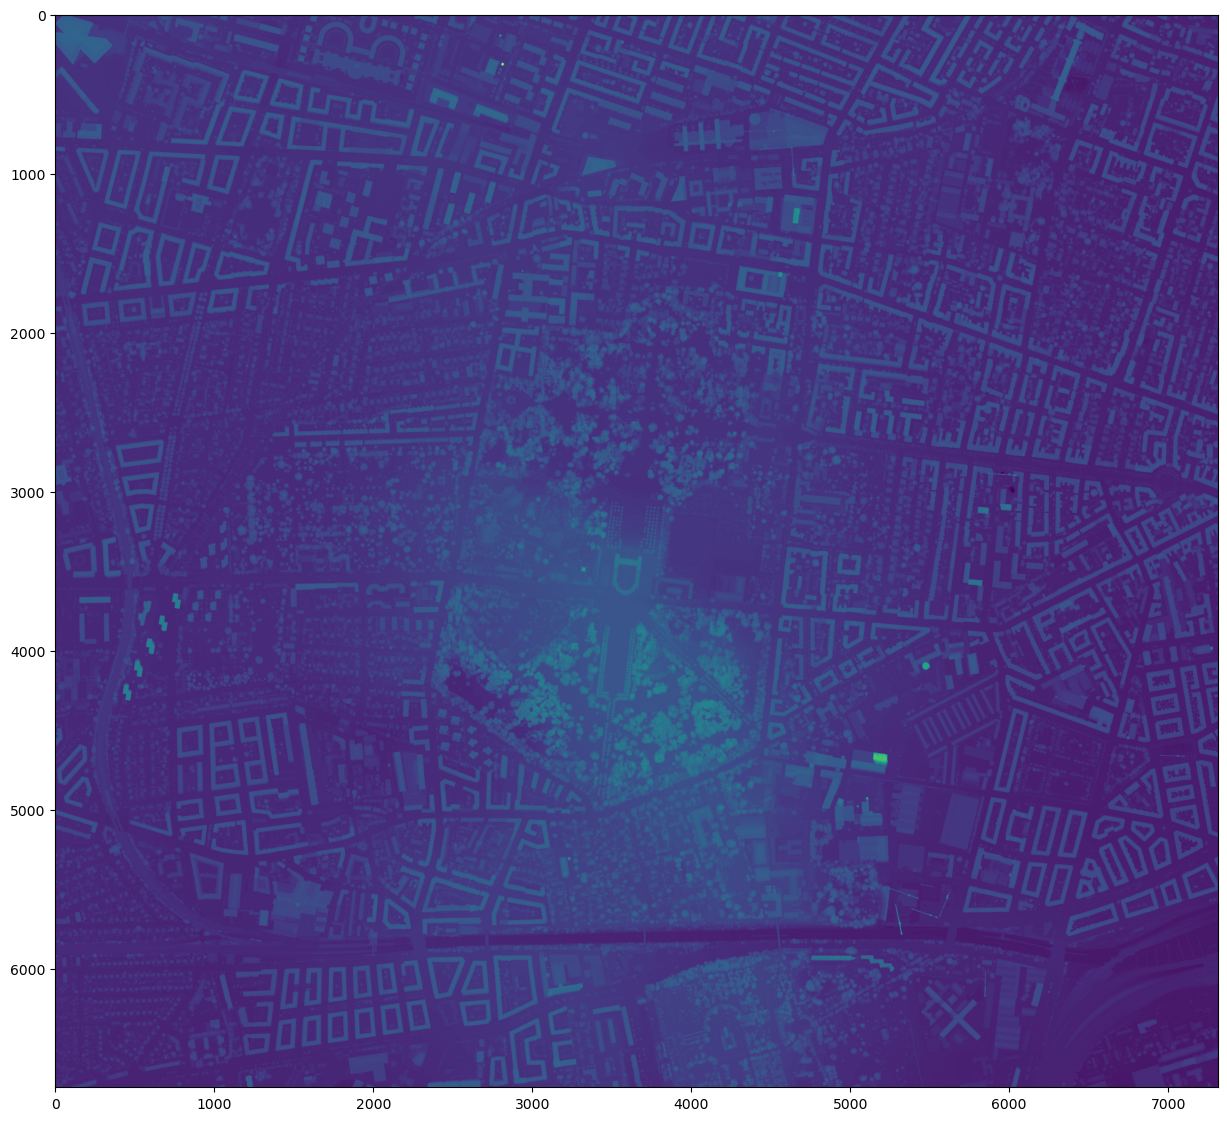

In [5]:
with rasterio.open('A:\\PhD\\Courses\\Geospatial-Analysis-2023-main\\zoo.tif') as dataset:
    dem=dataset.read(1)
    plt.figure(figsize=(15, 15))
    imgplot = plt.imshow(dem)

The python binding for the [DEMprocessing](https://gdal.org/python/osgeo.gdal-module.html#DEMProcessing) function in GDAL seems to be buggy, so we'll do that directly on the CLI:

In [6]:
!gdaldem slope zoo.tif zoo_slope.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [7]:
!gdaldem aspect zoo.tif zoo_aspect.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [8]:
!gdaldem hillshade zoo.tif zoo_hillshade.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!gdal_polygonize.py zoo_slope.tif zooo.shp 
# for vectorizing your raster, but recommend NOT to run it as it will create a massive file

In [15]:
!gdaldem roughness zoo.tif roughness.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


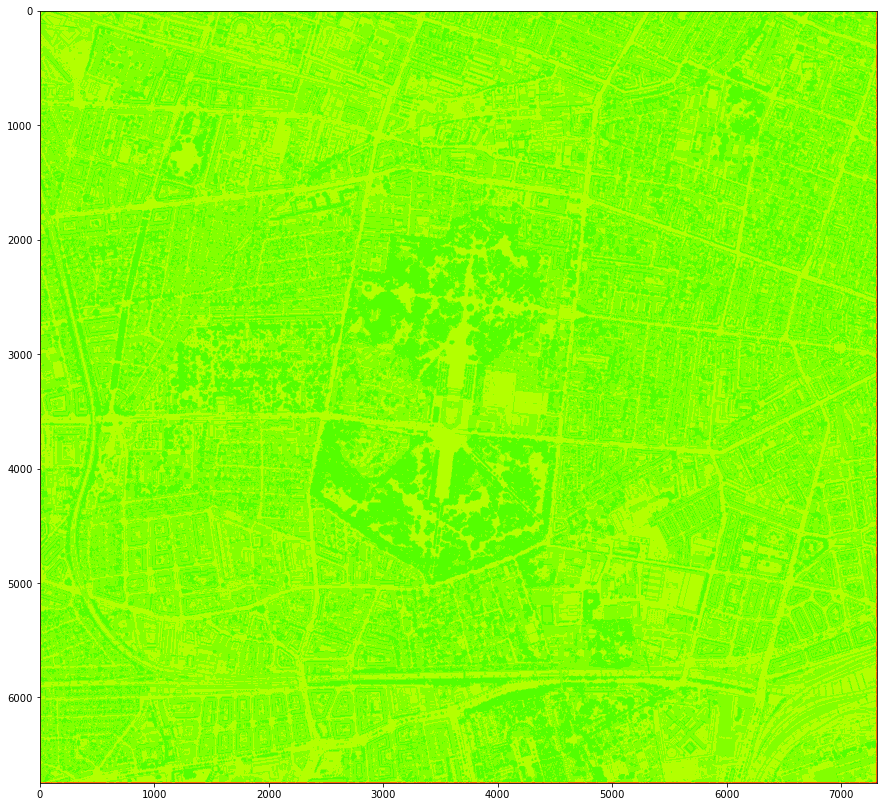

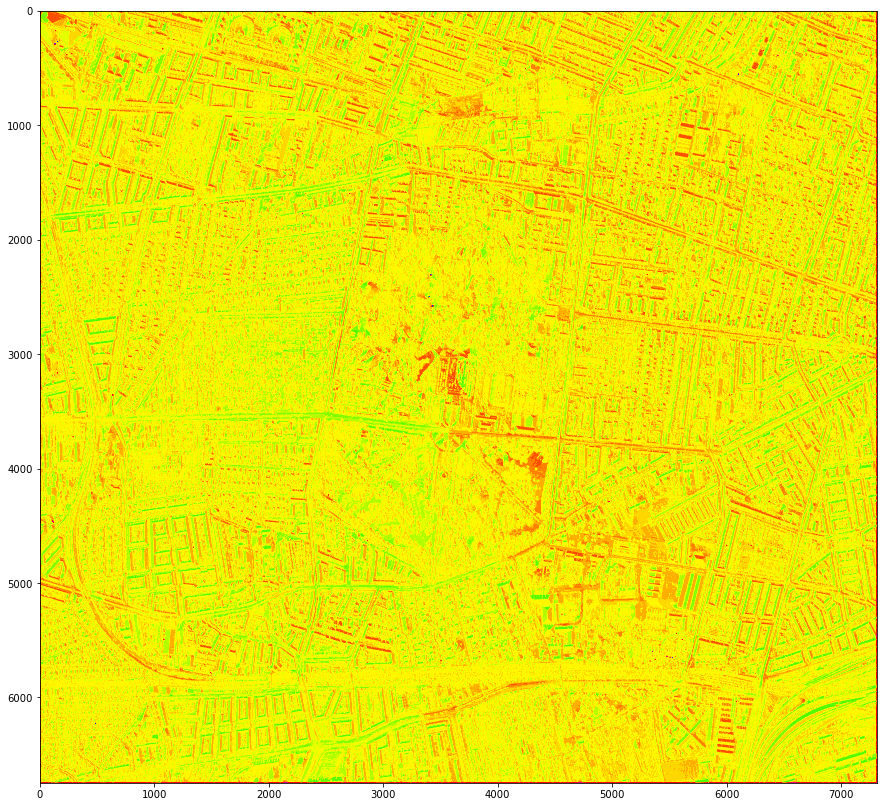

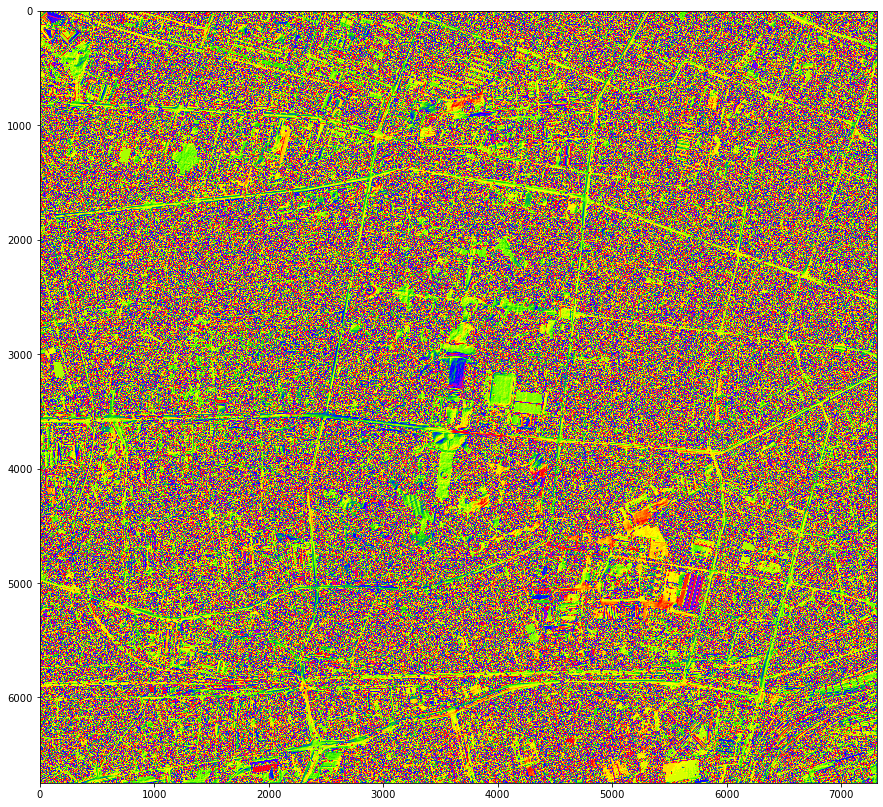

In [16]:
for ds in ['zoo_slope.tif', 'zoo_aspect.tif', 'zoo_hillshade.tif']:
    with rasterio.open(ds) as dataset:
        dem=dataset.read(1)
        plt.figure(figsize=(15, 15))
        imgplot = plt.imshow(dem, cmap='prism') 
        # try hot, prism, gray, more at https://matplotlib.org/stable/tutorials/colors/colormaps.html